<a href="https://colab.research.google.com/github/LightYe4r/stock_data_analysis-SDA-/blob/master/3_%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1_%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

❗ **Google Colab에서 실행해주세요!**

## 한글 폰트 설정
✅ 한글 폰트를 위해 아래 설치 후 런타임 재시작(세션 재시작)


## 모델 학습을 위한 GPU 설정
✅ 런타임 > 런타임 유형변경 > T4 GPU > 저장

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 네이버 증권에서 반도체 관련 종목 가져오기

✅ Google Drive 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


✅ Google Drive에서 Colab Notebooks 폴더 > 반도체주식 폴더 업로드

In [2]:
#stock = {}
stock_num2name = {}
with open('/content/drive/MyDrive/Colab Notebooks/반도체주식/네이버증권_반도체종목.txt','r') as f:
  lines = f.readlines()
  print(lines)
  for idx, line in enumerate(lines[::6]):
    #stock[line.strip()] = lines[idx*6+1].strip()
    stock_num2name[lines[idx*6+1].strip()] = line.strip()
print(stock_num2name)

['자람테크놀로지\n', '389020\n', '80,600\n', '상한가18,600\n', '+30.00%\n', '4,995\t733,986\n', 'GST\n', '083450\n', '55,000\n', '9,0509,050\n', '+19.70%\n', '5,125\t6,298,982\n', '시그네틱스\n', '033170\n', '2,025\n', '231231\n', '+12.88%\n', '1,736\t31,736,742\n', '넥스트칩\n', '396270\n', '13,390\n', '1,5701,570\n', '+13.28%\n', '2,417\t810,287\n', '엑시콘\n', '092870\n', '26,650\n', '3,1003,100\n', '+13.16%\n', '2,891\t8,572,284\n', '유니테스트\n', '086390\n', '17,720\n', '1,9901,990\n', '+12.65%\n', '3,745\t2,114,135\n', '테크윙\n', '089030\n', '26,650\n', '2,7502,750\n', '+11.51%\n', '9,955\t3,110,005\n', '유니셈\n', '036200\n', '9,320\n', '890890\n', '+10.56%\n', '2,858\t6,546,941\n', '티이엠씨\n', '425040\n', '21,850\n', '2,0702,070\n', '+10.47%\n', '4,644\t2,617,310\n', '한솔아이원스\n', '114810\n', '13,080\n', '1,1501,150\n', '+9.64%\n', '3,839\t1,281,859\n', '에이직랜드\n', '445090\n', '73,000\n', '6,4006,400\n', '+9.61%\n', '7,795\t1,479,011\n', '큐엠씨\n', '136660\n', '1,300\n', '110110\n', '+9.24%\n', '123\t1,376\n', '타이거

- 총 158개의 회사

In [9]:
print(len(stock_num2name))

158


✅ 필요할 라이브러리 설치

In [10]:
!pip install finance-datareader
!pip install beautifulsoup4
!pip install matplotlib
!pip install pandas_ta
!pip install plotly==5.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=43c882959f3d444456cfea421667052e44b49cb7a816005ea90b0a1c59e731ed
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 28.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


✅ 필요한 라이브러리 임포트

In [11]:
import FinanceDataReader as fdr
import pandas as pd
import pandas_ta as ta
import numpy as np
from matplotlib import gridspec
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from datetime import datetime, date
from dateutil.relativedelta import relativedelta
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# pre-processing

✅ FinanceDataReader 라이브러리에서 반도체 주가 데이터 가져오기

✅ 휴장일 떄 0으로 들어간 데이터 -> NaN으로 변경

✅ 결측치 이전값으로 채우고 남은 결측치는 0으로 설정


```
df.replace(0,np.nan,inplace=True)
df = df.fillna(method='pad')
df.fillna(0,inplace=True)
stock_data[value] = df
```



In [15]:
stock_data = {}
origin_data = {}
def downlaod_stockdata():
  global stock_data
  for value in stock_num2name.keys():
    df = fdr.DataReader(value)
    df.replace(0,np.nan,inplace=True)
    df = df.fillna(method='pad')
    #df = df.fillna(method='backfill')
    df.fillna(0,inplace=True)
    stock_data[value] = df
    origin_data[value] = df

krx = fdr.StockListing('KRX')
downlaod_stockdata()

# 재무제표와 합치기

- remove_comma(x) : 모든 데이터 타입에 대하여 x 안에 있는 쉼표제거
- merge_files(col_name) : 재무제표 데이터 안에서 col_name에 해당하는 열 데이터를 주가 데이터프레임에 분기에 맞게 붙이기 (ex. 2023/06 이면 이전 분기~2023/06 안에 있는 모든 주가에 대해 같은 값)

In [17]:
file_path = '/content/drive/MyDrive/Colab Notebooks/반도체주식/data_csv/'
def remove_comma(x):
    if isinstance(x, str):
        return x.replace(',', '')
    else:
        return str(x).replace(',', '')

def merge_files(col_name):
  global stock_data
  for value, name in stock_num2name.items():
    df = pd.read_csv(file_path+'A'+value+'.csv',header = 0,index_col=0)
    stock_df = stock_data[value]

    reverse_idx_date = ''
    for idx, idx_date in enumerate(list(df.index)):
      if idx == 0:
        stock_df.loc[:datetime.strptime(idx_date,'%Y/%m')+relativedelta(months=1),col_name] = df.loc[idx_date,col_name]
        reverse_idx_date = idx_date
      elif idx_date == list(df.index)[-1] :
        stock_df.loc[datetime.strptime(idx_date,'%Y/%m'):,col_name] = df.loc[idx_date,col_name]
      else:
        stock_df.loc[datetime.strptime(reverse_idx_date,'%Y/%m')+relativedelta(months=1):datetime.strptime(idx_date,'%Y/%m')+relativedelta(months=1),col_name] = df.loc[idx_date,col_name]
        reverse_idx_date = idx_date
    stock_data[value] = stock_df.applymap(remove_comma)
    print(stock_data[value])


In [18]:
ROA = 'ROA(%)(당기순이익(연율화) / 총자산(평균)) * 100ROA'
ROE = 'ROE(%)(지배주주순이익(연율화) / 지배주주지분(평균)) * 100ROE'
EPS = 'EPS(원)지배주주순이익 / 수정평균주식수EPS(원)'
BPS = 'BPS(원)지배주주순자산(자사주차감전) / 수정기말주식수BPS(원)'
PER = 'PER(배)수정주가(보통주) / 수정EPSPER'
PBR = 'PBR(배)수정주가(보통주) / 수정BPSPBR'
stock_num = '발행주식수'


financial_statement_list = ['매출액','영업이익','당기순이익'
                        ,'자산총계','부채총계','자본총계',ROA
                            ,ROE,EPS,BPS,PER,PBR,stock_num]
for f in financial_statement_list:
  merge_files(f)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

           ROA(%)(당기순이익(연율화) / 총자산(평균)) * 100ROA  \
Date                                               
2016-03-10                                -12.25   
2016-03-11                                -12.25   
2016-03-14                                -12.25   
2016-03-15                                -12.25   
2016-03-16                                -12.25   
...                                          ...   
2024-03-11                                 -8.37   
2024-03-12                                 -8.37   
2024-03-13                                 -8.37   
2024-03-14                                 -8.37   
2024-03-15                                 -8.37   

           ROE(%)(지배주주순이익(연율화) / 지배주주지분(평균)) * 100ROE  \
Date                                                    
2016-03-10                                     -14.19   
2016-03-11                                     -14.19   
2016-03-14                                     -14.19   
2

<ipython-input-17-00e33a60216b>:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stock_df.loc[datetime.strptime(idx_date,'%Y/%m'):,col_name] = df.loc[idx_date,col_name]


             Open   High    Low  Close   Volume                 Change    매출액  \
Date                                                                            
2004-12-10   4926   5517   4926   5517   330883                    0.0  390.0   
2004-12-13   6182   6182   4868   4861  1261172   -0.11890520210259203  390.0   
2004-12-14   4794   4841   4282   4440   492508   -0.08660769389014611  390.0   
2004-12-15   4525   4833   4439   4532   305739    0.02072072072072073  390.0   
2004-12-16   4532   4847   4532   4729   231424    0.04346866725507503  390.0   
...           ...    ...    ...    ...      ...                    ...    ...   
2024-03-11  29250  29350  28400  28600   526680   -0.04026845637583898  525.0   
2024-03-12  29150  31350  28700  31000  1055196    0.08391608391608396  525.0   
2024-03-13  31200  31450  29400  29950   813135   -0.03387096774193543  525.0   
2024-03-14  29550  29700  28700  28900   424632  -0.035058430717863076  525.0   
2024-03-15  28500  29400  28

<ipython-input-17-00e33a60216b>:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stock_df.loc[datetime.strptime(idx_date,'%Y/%m'):,col_name] = df.loc[idx_date,col_name]


               Open     High     Low Close      Volume                 Change  \
Date                                                                            
1999-11-23   9246.0   9842.0  9155.0  9384   1208900.0                    0.0   
1999-11-24   9521.0   9888.0  9292.0  9888   1867730.0   0.053708439897698135   
1999-11-25  10252.0  10436.0  9703.0  9796   2309110.0  -0.009304207119741115   
1999-11-26   9890.0  10210.0  8881.0  8926   1563030.0   -0.08881175990200085   
1999-11-29   8650.0   8879.0  8330.0  8605   1111910.0   -0.03596235715886176   
...             ...      ...     ...   ...         ...                    ...   
2024-03-11   1958.0   1960.0  1924.0  1940   1387619.0  -0.009193054136874323   
2024-03-12   1943.0   2135.0  1921.0  2095   6401570.0    0.07989690721649478   
2024-03-13   2080.0   2525.0  2060.0  2460  86368700.0    0.17422434367541761   
2024-03-14   2430.0   2475.0  2295.0  2330  17254607.0   -0.05284552845528456   
2024-03-15   2285.0   2325.0

<ipython-input-17-00e33a60216b>:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stock_df.loc[datetime.strptime(idx_date,'%Y/%m'):,col_name] = df.loc[idx_date,col_name]
<ipython-input-17-00e33a60216b>:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stock_df.loc[datetime.strptime(idx_date,'%Y/%m'):,col_name] = df.loc[idx_date,col_name]


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
...                                          ...   
2024-03-11                                 -1.69   
2024-03-12                                 -1.69   
2024-03-13                                 -1.69   
2024-03-14                                 -1.69   
2024-03-15                                 -1.69   

           ROE(%)(지배주주순이익(연율화) / 지배주주지분(평균)) * 100ROE  \
Date                                                    
2009-09-29                                       7.22   
2009-09-30                                       7.22   
2009-10-01                                       7.22   
2009-10-05                                       7.22   
2009-10-06                                       7.22   
...                                               ...   
2024-03-11                                      -1.98   
2024-03-12                                      -1.98   
2024-03-13                                      -1.98   
2024-03-14              

<ipython-input-17-00e33a60216b>:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stock_df.loc[datetime.strptime(idx_date,'%Y/%m'):,col_name] = df.loc[idx_date,col_name]


               Open     High      Low  Close  Volume                  Change  \
Date                                                                           
2014-07-01  20000.0  20000.0  20000.0  20000   100.0                     0.0   
2014-07-02  20000.0  20000.0  20000.0  20000   300.0                     0.0   
2014-07-03  20000.0  20000.0  20000.0  20000   300.0                     0.0   
2014-07-04  19900.0  19900.0  19900.0  19900   100.0  -0.0050000000000000044   
2014-07-07  19000.0  19000.0  19000.0  19000   100.0   -0.045226130653266305   
...             ...      ...      ...    ...     ...                     ...   
2024-03-11   1190.0   1190.0   1190.0   1190     1.0   -0.007506255212677226   
2024-03-12   1020.0   1360.0   1020.0   1300  1376.0     0.09243697478991586   
2024-03-13   1250.0   1250.0   1105.0   1250  1133.0   -0.038461538461538436   
2024-03-14   1300.0   1300.0   1100.0   1300    32.0    0.040000000000000036   
2024-03-15   1110.0   1110.0   1110.0   

<ipython-input-17-00e33a60216b>:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stock_df.loc[datetime.strptime(idx_date,'%Y/%m'):,col_name] = df.loc[idx_date,col_name]


             Open   High    Low  Close   Volume                  Change  \
Date                                                                      
2006-02-01   5007   5310   4309   4613  3452235                     0.0   
2006-02-02   4764   4825   4248   4446   830502    -0.03620203771948838   
2006-02-03   4340   4355   4036   4052   605013    -0.08861898335582541   
2006-02-06   3945   4324   3945   4082   651243    0.007403751233958644   
2006-02-07   4081   4157   3778   3778   526716    -0.07447329740323372   
...           ...    ...    ...    ...      ...                     ...   
2024-03-11  20000  20300  19640  19760  1211510    -0.03609756097560979   
2024-03-12  19900  20850  19410  20750  1376573     0.05010121457489869   
2024-03-13  21200  21350  19990  20050  1163101    -0.03373493975903619   
2024-03-14  19960  20150  19300  19360   972432   -0.034413965087281784   
2024-03-15  19250  19660  18980  19350   723895  -0.0005165289256198191   

              매출액   영업이익

<ipython-input-17-00e33a60216b>:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stock_df.loc[datetime.strptime(idx_date,'%Y/%m'):,col_name] = df.loc[idx_date,col_name]


             Open   High    Low  Close   Volume                  Change  \
Date                                                                      
2017-03-23  26000  30000  20450  21500  5360396                     0.0   
2017-03-24  21550  25500  20700  22200  4692232    0.032558139534883734   
2017-03-27  22000  22600  19750  19850   943568    -0.10585585585585588   
2017-03-28  19850  20250  18700  19300   619684   -0.027707808564231717   
2017-03-29  19350  20600  19100  19250   504923   -0.002590673575129543   
...           ...    ...    ...    ...      ...                     ...   
2024-03-11  60500  61200  57800  59200   225128    -0.04207119741100329   
2024-03-12  59100  62500  58500  61200   110485     0.03378378378378377   
2024-03-13  62300  63300  60700  61100    76563  -0.0016339869281045694   
2024-03-14  61100  61200  57600  58800   144713    -0.03764320785597386   
2024-03-15  57800  60400  57800  59900    81816    0.018707482993197244   

              매출액  영업이익 

<ipython-input-17-00e33a60216b>:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stock_df.loc[datetime.strptime(idx_date,'%Y/%m'):,col_name] = df.loc[idx_date,col_name]
<ipython-input-17-00e33a60216b>:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stock_df.loc[datetime.strptime(idx_date,'%Y/%m'):,col_name] = df.loc[idx_date,col_name]


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
...                                               ...   
2024-03-11                                       7.72   
2024-03-12                                       7.72   
2024-03-13                                       7.72   
2024-03-14                                       7.72   
2024-03-15                                       7.72   

           EPS(원)지배주주순이익 / 수정평균주식수EPS(원)  \
Date                                       
2006-01-17                         908.0   
2006-01-18                         908.0   
2006-01-19                         908.0   
2006-01-20                         908.0   
2006-01-23                         908.0   
...                                  ...   
2024-03-11                         348.0   
2024-03-12                         348.0   
2024-03-13                         348.0   
2024-03-14                         348.0   
2024-03-15                         348.0   

           BPS(원)지배주주순자산(자사주차감전) / 수정기말주식수BPS(원)

# 예측

## 예측을 위한 pre-processing

- drop_na(stock_code) :
  - 재무제표 데이터 중에서 모든 분기에 대해서 아예 데이터가 없는 column 존재 -> 열 삭제
  - 중간중간 존재하는 결측치는 다음 행의 값과 동일하게 설정

- drop_volume(stock_code) : 주가 데이터 중 Volume(거래량)은 주가와 연관성 높은 column이기에 삭제

In [9]:
def drop_na(stock_code):
  global stock_data
  stock_data[stock_code].replace('nan',np.nan,inplace=True)
  stock_data[stock_code] =  stock_data[stock_code].dropna(axis=1,how='all').fillna(method='ffill').fillna(method='bfill')


def drop_volume(stock_code):
  stock_data[stock_code] =  stock_data[stock_code].drop('Volume', axis=1).replace('완전잠식','-500.00').astype(dtype='float')

## 다음날 주가 예측

✅ 주가 예측에 필요한 라이브러리 임포트

In [10]:
import tensorflow as tf
import keras
import matplotlib.dates as mdates
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, learning_curve
from keras.regularizers import L1L2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

⭐ STOCK_PREDCTION : 하나의 종목에 대한 주가 예측에 필요한 함수를 모아놓은 클래스
  - make_feature_df() : 모델 학습 시 Close(종가)를 label(답), 이외의 칼럼들을 feature(모델입력값)로 새로운 데이터 프레임 생성
  - make_sequene_dataset(feature, label, window_size) : window_size에 해당하는 날짜만큼의 데이터를 넣고 다음날 예측값을 정답으로 지정(ex. 30일 동안의 전체 데이터를 보고 다음날의 주식 종가(Close)를 예측)
  - split_train_test() : 80 : 20으로 학습 데이터와 테스트 데이터 분리
  - train() : 모델(LSTM), optimizer(Adam), early_stopping 정의 및 학습
  - pred() : test 데이터로 예측
  - draw_plot(pred) : pred(예측값)을 가지고 그래프 그리기 및 성능 확인
  - pred_nextday(pred) : 다음날 주가 구하기

> MAPE & MAE & RMSE
- MAPE (Mean Absolute Percentage Error) : 예측값과 실제값 사이의 백분율 오차의 절대값의 평균을 나타내는 지표
- MAE (Mean Absolute Error) : 예측값과 실제값 사이의 절대 오차의 평균
- RMSE (Root Mean Square Error) : 예측값과 실제값 사이의 제곱 오차의 평균의 제곱근

  MAPE는 백분율 오차를 고려하여 모델의 예측 정확도를 평가하는 데 유용하며,
MAE는 각 예측 오차를 절대적으로 평가하므로 이해하기 쉽고 직관적이다. RMSE는 제곱 오차를 사용하여 예측 오차의 분산을 나타내므로, 큰 오차에 더 많은 페널티를 부여한다.

In [11]:
class STOCK_PREDICTION:
  def __init__(self, stock_name, stock_code):
    global stock_data
    self.stock_name = stock_name
    self.stock_code = stock_code
    self.window_size = 30

    self.train_loss_history = []
    self.val_loss_history = []
    drop_na(self.stock_code)
    try:
      drop_volume(self.stock_code)
    except:
      print('이미 volume이 drop된 dataframe입니다.')

    self.scaler = MinMaxScaler()


  def make_feature_df(self):
    self.scale_cols = stock_data[self.stock_code].columns.tolist()
    self.scaled_df = self.scaler.fit_transform(stock_data[self.stock_code])
    self.scaled_df = pd.DataFrame(self.scaled_df, columns=self.scale_cols)

    feature_cols = stock_data[self.stock_code].columns.drop('Close').tolist()
    label_cols = [ 'Close' ]

    feature_df = pd.DataFrame(self.scaled_df, columns=feature_cols)
    label_df = pd.DataFrame(self.scaled_df, columns=label_cols)

    self.feature_np = feature_df.to_numpy()
    self.label_np = label_df.to_numpy()

    print(f'feature_np.shape:{self.feature_np.shape}')
    print(f'label_np.shape:{self.label_np.shape}')

  def make_sequene_dataset(self, feature, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(feature)-window_size):
        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])
    return np.array(feature_list), np.array(label_list)

  def split_train_test(self):
    X, Y = self.make_sequene_dataset(self.feature_np, self.label_np, self.window_size)

    self.split = int(len(X)*0.80)
    self.x_train = X[0:self.split]
    self.y_train = Y[0:self.split]

    self.x_test = X[self.split:]
    self.y_test = Y[self.split:]

    print(f'X.shape:{X.shape}, Y.shape:{Y.shape}')
    print(f'x_train.shape:{self.x_train.shape}, y_train.shape:{self.y_train.shape}')
    print(f'x_test.shape:{self.x_test.shape}, y_test.shape:{self.y_test.shape}')

  def train(self):
    self.model = Sequential()
    self.model.add(LSTM(64, activation='tanh', input_shape=self.x_train[0].shape, return_sequences=False,
                  kernel_regularizer=L1L2(l1=0.0001, l2=0.0001), recurrent_regularizer=L1L2(l1=0.0001, l2=0.0001)))
    self.model.add(Dropout(0.2))
    self.model.add(Dense(1, activation='linear'))

    optimizer = keras.optimizers.Adam(learning_rate=0.01)
    self.model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    self.model.summary()

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    self.hist = self.model.fit(self.x_train, self.y_train,
              validation_data=(self.x_test, self.y_test),
              epochs=1000, batch_size=150,
              callbacks=[early_stop])

  def pred(self):
    return self.model.predict(self.x_test)

  def draw_plot(self, pred):
    plt.figure(figsize=(12, 6))
    plt.title(f'{self.stock_name} Prediction model')
    plt.ylabel('Close')
    plt.xlabel('period')
    plt.plot(self.y_test, label='actual')
    plt.plot(pred, label='prediction')
    plt.grid()
    plt.legend(loc='best')
    plt.show()

    self.train_loss_history.extend(self.hist.history['loss'])
    self.val_loss_history.extend(self.hist.history['val_loss'])

    plt.figure(figsize=(12, 6))
    plt.plot(self.train_loss_history, label='Training Loss')
    plt.plot(self.val_loss_history, label='Validation Loss')
    plt.legend()
    plt.title('Loss History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    mape = np.sum(abs(self.y_test - pred) / self.y_test) / len(self.x_test)
    mae = np.mean(np.abs(self.y_test - pred))
    rmse = np.sqrt(np.mean(np.square(self.y_test - pred)))

    metrics_df = pd.DataFrame({
        'Metrics': ['MAPE', 'MAE', 'RMSE'],
        'Values': [mape, mae, rmse]})

    print(metrics_df)

  def pred_nextday(self, pred):
    inverse_df = pd.DataFrame(np.zeros((len(self.y_test), len(self.scale_cols))), columns=self.scale_cols)
    inverse_df['Close'] = self.y_test.flatten()
    real_y_test = self.scaler.inverse_transform(inverse_df)[:, inverse_df.columns.get_loc('Close')]

    inverse_df['Close'] = pred.flatten()
    real_pred = self.scaler.inverse_transform(inverse_df)[:, inverse_df.columns.get_loc('Close')]

    dates = stock_data[self.stock_code].index[self.split+self.window_size:].values

    tech_result_df = pd.DataFrame({
        'Date': dates,
        'Real Price': real_y_test,
        'Predicted Price': real_pred
    })

    last_date = pd.to_datetime(stock_data[self.stock_code].index[-1])

    if last_date.weekday() == 4:
        next_day = last_date + pd.Timedelta(days=3)
    else:
        next_day = last_date + pd.Timedelta(days=1)

    recent_feature = self.feature_np[-self.window_size:]
    recent_feature = recent_feature.reshape(1, self.window_size, -1)

    predicted_new = self.model.predict(recent_feature)

    dummy_data = np.zeros((1, self.scaled_df.shape[1] - 1))
    predicted_new_full_features = np.hstack([predicted_new, dummy_data])

    pred_next_day = self.scaler.inverse_transform(predicted_new_full_features)[0, 0]

    print(f"{self.stock_name}의 현재 주가 : {stock_data[self.stock_code]['Close'][-1]}\t 다음날 예상 주가 : {pred_next_day}")
    return stock_data[self.stock_code]['Close'][-1], pred_next_day


### 반도체 종목들을 하나씩 학습 후 예측하여 diff_stock.txt에 저장
❗ GPU 사용량이 많아 중간에 끊길 확률이 크다.

❗ start를 계속 바꾸면서 여러 단계 끊어 돌릴 수 있다.

❗ 한 번에 돌리고 싶으면 주석을 해제하고 아래 for문을 주석처리하면 된다.

In [ ]:
diff_stock = []

start = 147
batch = 1

with open('diff_stock.txt','a') as f:
  #for name, value in stock.items():
  for value, name in list(stock_num2name.items())[start:start+batch]:
    stock_pred = STOCK_PREDICTION(name,value)
    stock_pred.make_feature_df()
    stock_pred.split_train_test()
    stock_pred.train()
    pred = stock_pred.pred()
    stock_pred.draw_plot(pred)
    today, nextday = stock_pred.pred_nextday(pred)
    now = [str(nextday), str(today), str(float(nextday)-float(today)),str(name),str(value)]
    diff_stock.append(now)
    f.write(','.join(now))
    f.write('\n')


### 많이 오르는 종목 찾기

✅ diff_stock을 읽어와 가장 많이 오른 순으로 정렬
- 에러 발생하면 encoding 바꿔보기('cp949' or 'UTF-8')

In [19]:
diff_stock = []
stock_set = []
with open('/content/drive/MyDrive/Colab Notebooks/반도체주식/diff_stock.txt','r', encoding='cp949') as f:
  lines = f.readlines()
  for line in lines:
    splited = line.split(',')
    diff, stock_code = float(splited[2]), str(splited[-1]).strip()
    stock_set.append(stock_code)
    diff_stock.append([diff, stock_code])
diff_stock.sort(key = lambda x : x[0], reverse=True)

✅ Top10 출력

In [20]:
top10 = [ code for _, code in diff_stock[:10] ]
top10

['224060',
 '195870',
 '402340',
 '330860',
 '166090',
 '000660',
 '357780',
 '240810',
 '183300',
 '136660']

# visualization

* match_dfshape(df, start_date, end_date) : start_date부터 end_date까지 데이터 프레임에서 추출
* cal_sma_ema_rsi(df) : 각 지표에 대한 계산 및 그래프를 위한 새로운 칼럼 생성
* draw_candlechart(df) : 주가 데이터 캔들차트 그리기
* draw_sma_ema(name,df) : 이동평균 지표들과 주가 데이터 함께 보기
* draw_rsi(stock_name, stock_data) : rsi 그래프 그리기
* draw_bbbands(stock_name, stock_data) :

In [49]:
def match_dfshape(df, start_date, end_date):
    expected_dates = pd.date_range(start=start_date, end=end_date)
    missing_dates_data = pd.DataFrame(index=expected_dates, columns=df.columns)
    filled_df = pd.concat([df, missing_dates_data]).sort_index()
    #filled_df.fillna(method='ffill', inplace=True)  # 이전 값으로 결측치 채우기
    #filled_df.fillna(0, inplace=True)
    filtered_data = df.loc[start_date:end_date,:]
    return filtered_data

def cal_sma_ema_rsi(df):
  df['Change']=df['Close'].astype('float')-df['Open'].astype('float')
  df.loc[df['Change']>=0,'Volumecolor']=1
  df.loc[df['Change']<0,'Volumecolor']=0
  df[['Change','Volumecolor']]

  # 단순 이동평균
  df.loc[:, 'SMA_20'] = ta.sma(df['Close'].astype('float'),length=20)
  df.loc[:, 'SMA_60'] = ta.sma(df['Close'].astype('float'),length=60)

  # 지수 이동평균
  df.loc[:, 'EMA_20'] = ta.ema(df['Close'].astype('float'), 20)
  df.loc[:, 'EMA_60'] = ta.ema(df['Close'].astype('float'), 60)

  # RSI
  df.loc[:, 'RSI_14'] = ta.rsi(df['Close'].astype('float'), length=14)
  df.loc[:, 'RSI_14'] = df['RSI_14'].fillna(0)
  return df

def draw_candlechart(name, df):
  df['Change']=df['Close']-df['Open']
  df.loc[df['Change']>=0,'Volumecolor']=1
  df.loc[df['Change']<0,'Volumecolor']=0
  df[['Change','Volumecolor']]
  fig = make_subplots(rows=2,
                      cols=1,
                      shared_xaxes=True,
                      )

  fig = make_subplots(rows=2, cols=1)

  fig.add_trace(
      go.Candlestick(x=df.index,
                  open=df['Open'],
                  high=df['High'],
                  low=df['Low'],
                  close=df['Close'],
                  increasing_line_color= 'red', decreasing_line_color= 'blue',
                  name='주가'
                  ),
                  row=1, col=1
  )

  fig.add_trace(
      go.Bar(x=df.index, y=df['Volume'],
            marker=dict(color=df['Volumecolor'],colorscale='BlueRed'),
            name='거래량'),
      row=2, col=1
  )

  fig.update(layout_xaxis_rangeslider_visible=False)
  fig.update_layout(title_text=name)

  fig.show()

def draw_sma_ema(name,df):
  #df = cal_sma_ema_rsi(df)

  fig = make_subplots(rows=2,
                      cols=1,
                      shared_xaxes=True,
                      vertical_spacing=0.1)

  fig = make_subplots(rows=2, cols=1)

  fig.add_trace(
      go.Candlestick(x=df.index,
                  open=df['Open'],
                  high=df['High'],
                  low=df['Low'],
                  close=df['Close'],
                  increasing_line_color= 'red', decreasing_line_color= 'blue',
                  name='주가'
                  ),
                  row=1, col=1
  )

  fig.add_trace(
      go.Scatter(x=df.index, y=df['SMA_20'],
                line=dict(color="#b66aa0"),
                name='SMA_20'),
      row=1, col=1
  )

  fig.add_trace(
      go.Scatter(x=df.index, y=df['SMA_60'],
                line=dict(color="#414b73"),
                  name='SMA_60'),
      row=1, col=1
  )

  fig.add_trace(
      go.Scatter(x=df.index, y=df['EMA_20'],
                line=dict(color="#8b8b8b"),
                  name='EMA_20'),
      row=1, col=1
  )


  fig.add_trace(
      go.Scatter(x=df.index, y=df['EMA_60'],
                line=dict(color="#e8d887"),
                  name='EMA_60'),
      row=1, col=1
  )

  fig.add_trace(
      go.Bar(x=df.index, y=df['Volume'],
            marker=dict(color=df['Volumecolor'],colorscale='BlueRed'),
            name='거래량'),
      row=2, col=1
  )

  fig.update(layout_xaxis_rangeslider_visible=False)
  fig.update_layout(title_text=name)

  fig.show()


# RSI
def draw_rsi(stock_name, stock_data):
  fig = plt.subplots(figsize=(10, 6), sharex=True)
  gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 1])

  # 주가 나타내기
  ax1 = plt.subplot(gs[0])
  ax1 = stock_data['Close'].plot()
  ax1.set_xlabel('')
  ax1.axes.xaxis.set_ticks([])
  plt.title(stock_name)

  # RSI 나타내기
  ax2 = plt.subplot(gs[1])
  ax2 = stock_data['RSI_14'].plot(color='black', ylim=[0, 100])
  ax2.axhline(y=70, color='r', linestyle='-')
  ax2.axhline(y=30, color='r', linestyle='-')
  ax2.set_xlabel
  plt.subplots_adjust(wspace=0, hspace=0)

  plt.show()

def draw_bbbands(stock_name, stock_data):
  band = ta.bbands(stock_data["Close"], length=20, std=2)
  bb = pd.concat([band[['BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0']], stock_data['Close']], axis = 1)
  bb.columns = ['Lower Band', 'Mid Band', 'Upper Band', 'Close']
  bb.plot(figsize=(10, 6),
          color={
              'Upper Band': 'red',
              'Lower Band': 'blue',
              'Mid Band': 'green',
              'Close': 'black'
          })
  plt.title(stock_name)
  plt.show()

✅ Top10 종목에 대해 캔들차트 그리기

In [75]:
#idx = 2
idx = 0

In [76]:
draw_candlechart(stock_num2name[top10[idx]], origin_data[top10[idx]])

In [77]:
draw_candlechart(stock_num2name[top10[idx]], match_dfshape(origin_data[top10[idx]],'2024-01','2024-03'))

<ipython-input-49-483ebc6b907d>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



- 단순 이동평균(SMA, Simple Moving Average) : 특정 기간 동안의 평균 가격
  * SMA 20 : 20일 동안의 단순 이동평균
  * SMA 60 : 60일 동안의 단순 이동평균
* 지수 이동평균(EMA, Exponential Moving Average) : 가장 최근의 데이터에 높은 가중치를 부여하고, 과거의 데이터에 지수적으로 감소하는 가중치를 부여하여 계산한 평균 가격
  * EMA 20 : 20일 동안의 지수 이동평균
  * EMA 60 : 60일 동안의 지수 이동평균




---
❗20일 동안의 이동평균선이 60일 동안의 이동평균선 상향 돌파 시 ▶ 골든크로스 📈 매수시점

❗20일 동안의 이동평균선이 60일 동안의 이동평균선 하향 돌파 시 ▶ 데드크로스 📉 매도시점

✅ 전체 확인

In [78]:
draw_sma_ema(stock_num2name[top10[idx]], cal_sma_ema_rsi(origin_data[top10[idx]]))

✅ 올해만 확인

In [79]:
draw_sma_ema(stock_num2name[top10[idx]], match_dfshape(cal_sma_ema_rsi(origin_data[top10[idx]]),'2024-01','2024-03'))

* 상대강도지수(RSI,Relative Strength Index)
  * 가격의 상승과 하락 추세를 측정하는 데 사용되는 기술적 지표
  * 가격 상승 폭과 하락 폭을 비교하여 주가의 상대적 강도를 측정

  * 과매수 및 과매도 상태 감지

  ⏩  과매도 상태 시 📈 매수신호
  
  ⏩  과매수 상태 시 📉 매도신호



---


* 볼린저 밴드(Bollinger Bands)
  * 주가의 변동성과 가격의 상대적 위치를 판단하는 데 사용되는 기술적 지표
  * 중심선, 상단 밴드, 하단 밴드로 구성

  ⏩  상단 밴드 위로 올라가면 📈 매수신호
  
  ⏩  하단 밴드 아래로 내려가면 📉 매도신호

<ipython-input-49-483ebc6b907d>:135: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from current font.



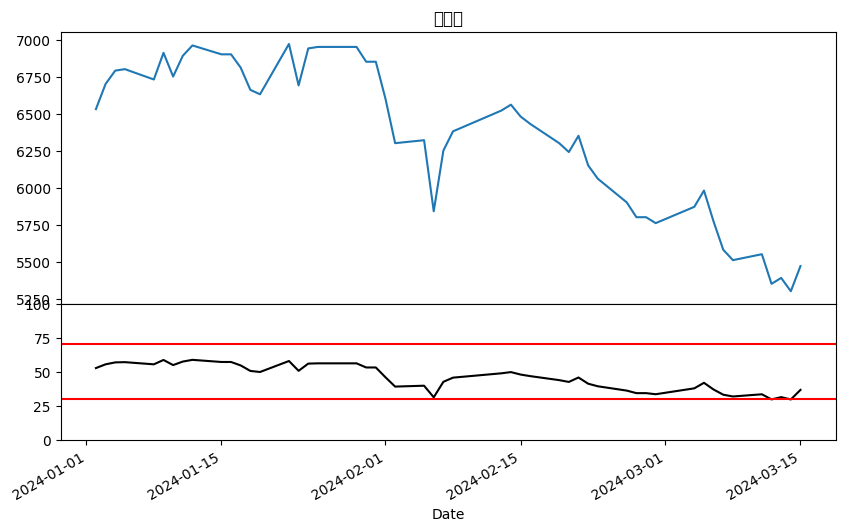

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from current font.



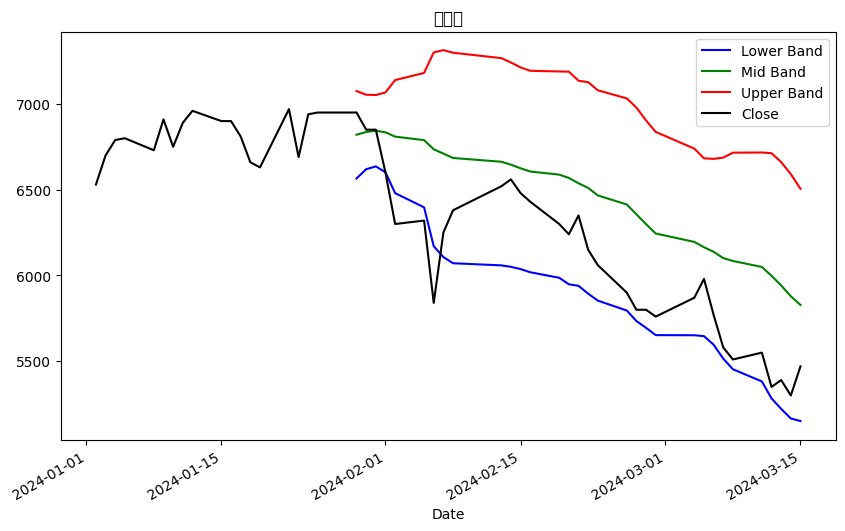

In [80]:
draw_rsi(stock_num2name[top10[idx]], match_dfshape(cal_sma_ema_rsi(origin_data[top10[idx]]),'2024-01','2024-03'))
draw_bbbands(stock_num2name[top10[idx]], match_dfshape(cal_sma_ema_rsi(origin_data[top10[idx]]),'2024-01','2024-03'))